##  Fisher's exact test to each specific pathological feature
1. of highly predictive patches vs non informative patches within each gene signature
2. of highly predictive patches for each 2 gene signatures
3. of highly predictive patches for each gene signature vs the rest signatures

## Chi squared test for all features (yes) of highly predictive patches for 6 signatures
### Independency test of features of highly predictive patches

In [2]:
# only work with the conda envrionment "deepai"

In [2]:
import os
import pandas as pd
import numpy as np
# install dependency for pd to read xlsx
# !conda install -c anaconda xlrd
from scipy.stats import chi2_contingency, chisquare, fisher_exact
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Path and load the gene signature list

In [3]:
path = "/media/visiopharm5/WDGold/deeplearning/MIL/CLAM/patch_reviewing"
signatures = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.xlsx') and not file.startswith('_'):
            signatures.append(file[:-5])
print(signatures)

['Interferon_Gamma_Biology', '6G_Interferon_Gamma', 'Gajewski_13G_Inflammatory', 'Inflammatory', 'Ribas_10G_Interferon_Gamma', 'T-cell_Exhaustion']


In [320]:
os.makedirs(os.path.join(path, 'specific_feature_within_signature'), exist_ok=True)
os.makedirs(os.path.join(path, 'specific_feature_for_2signatures'), exist_ok=True)

## Fisher's exact test
### Fisher exact test for specific feature within a signature

In [4]:
for ii in range(len(signatures)):
    # load patch reviewing data
    df = pd.read_excel(os.path.join(path, signatures[ii]+'.xlsx'))
    # keep only patches in tp slides
    df = df.loc[df['class']=='tp']
    print(df.shape)
    display(df.head(3))
    
    if ii == 0:
        # save the order and name of features
        features = list(df.iloc[:, 4:].columns)
        # df to summarize the feature yes / no counts in only predictive patches of all signatures
        df_predictive_signatures = pd.DataFrame()
    
    # intermediate df to save feature yes / no counts in predictive and non-informative patches within a signature
    df_res = pd.DataFrame(columns = ['predictive'] + features)

    # df to save patch reveiewing info for predictive patches
    df_high = pd.DataFrame(columns = features)
    for n in range(df.shape[0]//16):
        for j in range(8):
            df_high.loc[len(df_high)] = df.iloc[n*16+j+8, 4:][df_high.columns]
    # save the count of all features
    df_res.loc[len(df_res)] = [1] + list(df_high.sum().values)
    
    # df to save patch reveiewing info for non-informatvie patches
    df_low = pd.DataFrame(columns = features)
    for n in range(df.shape[0]//16):
        for j in range(8):
                df_low.loc[len(df_low)] = df.iloc[n*16+j, 4:][df_low.columns]
    # save the count of all features
    df_res.loc[len(df_res)] = [0] + list(df_low.sum().values)

#     assert list(sumup.index) == features                 

    df_res.set_index(['predictive'],inplace=True)
    display(df_res)
    
    # stacked transposed contingency table for all features
    df_contingency = pd.DataFrame(columns=['Highly predictive', 'Non informative'])
    for i in range(len(df_res.columns)):
        df_contingency.loc[df_res.columns[i]+' yes'] = df_res.T.loc[df_res.columns[i]].values
        df_contingency.loc[df_res.columns[i]+' no'] = len(df)/2 - df_res.T.loc[df_res.columns[i]].values
    df_contingency.rename_axis("Feature", inplace=True)
    print(df_contingency.shape)
    display(df_contingency.head(4))
#     df_contingency.to_csv(os.path.join(path, 'specific_feature_within_signature', signatures[ii]+'_summary.csv'), index=True)
    
    # save feature counts of only predictive for all signatures
    df_predictive_signatures[signatures[ii]] = df_contingency['Highly predictive'].values

    # Fisher's exact for each gene within a signature
    df_fisher_exact = pd.DataFrame(columns=['oddsratio', 'p-value'])
    for i in range(len(df_res.columns)):
        df_fisher_exact.loc[df_res.columns[i]] = list(fisher_exact([list(df_contingency.iloc[2*i:2*(i+1), 0].values), list(df_contingency.iloc[2*i:2*(i+1), 1].values)]))
    print(df_fisher_exact.shape)
    display(df_fisher_exact.head(3))
#     df_fisher_exact.to_csv(os.path.join(path, 'specific_feature_within_signature', signatures[ii]+'_fisher-exact.csv'), index=True)
    
df_predictive_signatures.index = df_contingency.index.values
df_predictive_signatures.rename_axis('Only highly predictive', inplace=True)
print(df_predictive_signatures.shape)
display(df_predictive_signatures.head(5))
# df_predictive_signatures.to_csv(os.path.join(path, 'specific_feature_for_2signatures', 'summary_predictive_signatures.csv'), index=True)

(224, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Macrotrabecular,Microtrabecular,Compact,steatosis,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,223,HMNT0073_bis - 2017-06-17 22.30.07,HMNT0073_bis - 2017-06-17 22.30.07_-1_0.0_[153...,tp,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,222,HMNT0073_bis - 2017-06-17 22.30.07,HMNT0073_bis - 2017-06-17 22.30.07_-2_6.077180...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,221,HMNT0073_bis - 2017-06-17 22.30.07,HMNT0073_bis - 2017-06-17 22.30.07_-3_0.000121...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,eosinophils,plasma cells,cholestasis,clear cells,...,Macrotrabecular,Microtrabecular,Compact,steatosis,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
predictive,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,6.0,3.0,0.0,108.0,11.0,2.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0.0,102.0,3.0,9.0,0.0,39.0,0.0,0.0,1.0,9.0,0.0,...,0.0,12.0,67.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0


(46, 2)


,Highly predictive,Non informative
Feature,,
Tumor cells yes,1.0,102.0
Tumor cells no,111.0,10.0
vessels yes,6.0,3.0
vessels no,106.0,109.0


(23, 2)


,oddsratio,p-value
Tumor cells,0.000883,1.817058e-50
vessels,2.056604,4.988015e-01
blood,0.314985,1.350873e-01


(80, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,79,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-1_0.0_[273...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-2_0.000150...,tp,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-3_0.000300...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,eosinophils,plasma cells,cholestasis,clear cells,...,Macrotrabecular,Microtrabecular,Compact,steatosis,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
predictive,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,7.0,3.0,0.0,31.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,11.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(46, 2)


,Highly predictive,Non informative
Feature,,
Tumor cells yes,1.0,11.0
Tumor cells no,39.0,29.0
vessels yes,7.0,0.0
vessels no,33.0,40.0


(23, 2)


,oddsratio,p-value
Tumor cells,0.067599,0.003255
vessels,inf,0.011738
blood,0.099099,0.000243


(144, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,143,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-1_0.0_[256...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,142,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-2_0.000150...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,141,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-3_0.000300...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,eosinophils,plasma cells,cholestasis,clear cells,...,Macrotrabecular,Microtrabecular,Compact,steatosis,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
predictive,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,3.0,0.0,0.0,64.0,4.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,21.0,1.0,5.0,0.0,10.0,1.0,0.0,6.0,0.0,0.0,...,0.0,7.0,12.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0


(46, 2)


,Highly predictive,Non informative
Feature,,
Tumor cells yes,1.0,21.0
Tumor cells no,71.0,51.0
vessels yes,3.0,1.0
vessels no,69.0,71.0


(23, 2)


,oddsratio,p-value
Tumor cells,0.034205,0.000002
vessels,3.086957,0.619699
blood,0.000000,0.058176


(144, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,143,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-1_0.0_[133...,tp,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,142,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-2_0.000150...,tp,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,141,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-3_0.000300...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,eosinophils,plasma cells,cholestasis,clear cells,...,Macrotrabecular,Microtrabecular,Compact,steatosis,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
predictive,,,,,,,,,,,,,,,,,,,,,
1.0,3.0,0.0,5.0,0.0,66.0,6.0,1.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,60.0,1.0,12.0,25.0,26.0,2.0,0.0,0.0,0.0,0.0,...,19.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(46, 2)


,Highly predictive,Non informative
Feature,,
Tumor cells yes,3.0,60.0
Tumor cells no,69.0,12.0
vessels yes,0.0,1.0
vessels no,72.0,71.0


(23, 2)


,oddsratio,p-value
Tumor cells,0.008696,3.826923e-24
vessels,0.000000,1.000000e+00
blood,0.373134,1.193101e-01


(64, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,63,HMNT0185_bis - 2017-06-15 14.01.13,HMNT0185_bis - 2017-06-15 14.01.13_-1_0.0_[167...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62,HMNT0185_bis - 2017-06-15 14.01.13,HMNT0185_bis - 2017-06-15 14.01.13_-2_0.000245...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61,HMNT0185_bis - 2017-06-15 14.01.13,HMNT0185_bis - 2017-06-15 14.01.13_-3_0.000490...,tp,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,eosinophils,plasma cells,cholestasis,clear cells,...,Macrotrabecular,Microtrabecular,Compact,steatosis,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
predictive,,,,,,,,,,,,,,,,,,,,,
1.0,2.0,2.0,0.0,0.0,24.0,3.0,0.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(46, 2)


,Highly predictive,Non informative
Feature,,
Tumor cells yes,2.0,0.0
Tumor cells no,30.0,32.0
vessels yes,2.0,1.0
vessels no,30.0,31.0


(23, 2)


,oddsratio,p-value
Tumor cells,inf,0.492063
vessels,2.066667,1.000000
blood,0.000000,0.000002


(256, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,255,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-1_0.0_[117...,tp,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,254,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-2_0.000150...,tp,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,253,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-3_0.000300...,tp,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,eosinophils,plasma cells,cholestasis,clear cells,...,Macrotrabecular,Microtrabecular,Compact,steatosis,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
predictive,,,,,,,,,,,,,,,,,,,,,
1.0,5.0,2.0,9.0,0.0,118.0,1.0,2.0,12.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,64.0,8.0,38.0,0.0,26.0,0.0,0.0,3.0,5.0,0.0,...,0.0,0.0,20.0,9.0,0.0,6.0,0.0,0.0,0.0,0.0


(46, 2)


,Highly predictive,Non informative
Feature,,
Tumor cells yes,5.0,64.0
Tumor cells no,123.0,64.0
vessels yes,2.0,8.0
vessels no,126.0,120.0


(23, 2)


,oddsratio,p-value
Tumor cells,0.040650,3.773515e-18
vessels,0.238095,1.024832e-01
blood,0.179124,3.455134e-06


(46, 6)


,Interferon_Gamma_Biology,6G_Interferon_Gamma,Gajewski_13G_Inflammatory,Inflammatory,Ribas_10G_Interferon_Gamma,T-cell_Exhaustion
Only highly predictive,,,,,,
Tumor cells yes,1.0,1.0,1.0,3.0,2.0,5.0
Tumor cells no,111.0,39.0,71.0,69.0,30.0,123.0
vessels yes,6.0,7.0,3.0,0.0,2.0,2.0
vessels no,106.0,33.0,69.0,72.0,30.0,126.0
blood yes,3.0,3.0,0.0,5.0,0.0,9.0


### For specific feature in each 2 signatures

In [324]:
# list all combinations of each 2 signatures
list_comb = list(itertools.combinations(df_predictive_signatures.columns.values, 2))
print(len(list_comb))


for comb in list_comb:
    # Fisher's exact test for each 2 signatures
    df_fisher_exact_2signatures = pd.DataFrame(columns=['oddsratio', 'p-value'])
#     for i in range(len(df_predictive_signatures)//2):
    for i in range(len(df_res.columns)):
        df_fisher_exact_2signatures.loc[df_res.columns[i]] = list(fisher_exact([list(df_predictive_signatures.loc[df_predictive_signatures.index[2*i:2*(i+1)], comb[0]].values), 
                      list(df_predictive_signatures.loc[df_predictive_signatures.index[2*i:2*(i+1)], comb[1]].values)]))

    df_fisher_exact_2signatures.rename_axis('Only highly predictive', inplace=True)
    print(df_fisher_exact_2signatures.shape)
    display(df_fisher_exact_2signatures.head(3))
    df_fisher_exact_2signatures.to_csv(os.path.join(path, 'specific_feature_for_2signatures', comb[0]+'_VS_'+comb[1]+'_fisher-exact.csv'), index=True)

15
(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,1.820513,1.000000
vessels,4.878788,0.032958
blood,inf,0.043349


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.589744,1.000000
vessels,inf,0.000515
blood,1.086486,1.000000


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,2.846154,0.458348
vessels,3.747475,0.041462
blood,2.945946,0.186928


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.384615,0.581489
vessels,3.181818,0.282083
blood,inf,0.248826


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.630769,1.000000
vessels,13.363636,0.000684
blood,1.072072,1.000000


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.323944,0.619699
vessels,inf,0.244755
blood,0.000000,0.058176


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,1.563380,1.00000
vessels,0.768116,1.00000
blood,0.000000,0.28154


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.211268,0.223345
vessels,0.652174,0.642014
blood,NaN,1.000000


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.346479,0.422062
vessels,2.739130,0.352965
blood,0.000000,0.027780


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,4.826087,0.301168
vessels,0.000000,0.082915
blood,2.711443,0.265733


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.652174,0.642014
vessels,0.000000,0.092606
blood,inf,0.320346


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,1.069565,1.000000
vessels,0.000000,0.536884
blood,0.986733,1.000000


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.135135,0.124167
vessels,0.849057,1.000000
blood,inf,1.000000


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,0.221622,0.219161
vessels,3.566038,0.150736
blood,0.363914,0.146716


(23, 2)


,oddsratio,p-value
Only highly predictive,,
Tumor cells,1.64,0.627764
vessels,4.20,0.178834
blood,0.00,0.206262


### For specific feature in each signature vs the rest signatures

In [38]:
df_fisher_exact_1vsrest_signatures = pd.DataFrame(index=df_res.columns, columns=signatures)
for signature in signatures:
    # Fisher's exact test for each signature vs the rest
#     for i in range(len(df_predictive_signatures)//2):
    for i in range(len(df_res.columns)):
        df_fisher_exact_1vsrest_signatures.loc[df_res.columns[i], signature] = list(fisher_exact([list(df_predictive_signatures.loc[df_predictive_signatures.index[2*i:2*(i+1)], signature].values), 
                      list(df_predictive_signatures.loc[df_predictive_signatures.index[2*i:2*(i+1)], df_predictive_signatures.columns != signature].sum(axis=1).values)]))[1]

df_fisher_exact_1vsrest_signatures.rename_axis('p-value (only highly predictive)', inplace=True)
print(df_fisher_exact_1vsrest_signatures.shape)
display(df_fisher_exact_1vsrest_signatures.head(3))
df_fisher_exact_1vsrest_signatures.to_csv(os.path.join(path, 'specific_feature_for_1vsrest_signatures_fisher-exact.csv'), index=True)

(23, 6)


,Interferon_Gamma_Biology,6G_Interferon_Gamma,Gajewski_13G_Inflammatory,Inflammatory,Ribas_10G_Interferon_Gamma,T-cell_Exhaustion
p-value (only highly predictive),,,,,,
Tumor cells,0.201938,1,0.70216,0.441375,0.229751,0.36769
vessels,0.59644,0.00078083,1,0.0551362,0.642998,0.076249
blood,0.428851,0.40476,0.0551362,0.223658,0.38404,0.123071


## Chi squared test

### For each feature, if there is a cell with value smaller than 5, exclude the belonged signature
#### If there are more than 1 signature, performed chi squared test
#### Otherwise, fill with nan
#### Also save the number of signature included

In [20]:
df_chi_squared_signatures = pd.DataFrame(columns = ['chi2', 'p-values', 'dof', 'signatures included'])
print(df_predictive_signatures.shape)
display(df_predictive_signatures.head(5))
for i in range(len(df_predictive_signatures)//2):
    df_dummy = df_predictive_signatures.iloc[2*i:2*i+2,:][df_predictive_signatures.iloc[2*i:2*i+2,:]>=5].dropna(axis=1)
    if len(df_dummy.columns.values) >= 2:
        df_chi_squared_signatures.loc[len(df_chi_squared_signatures)] = list(chi2_contingency(df_dummy))[0:3] + [len(df_dummy.columns.values)]
    else:
        df_chi_squared_signatures.loc[len(df_chi_squared_signatures)] = [np.nan, np.nan, np.nan, len(df_dummy.columns.values)]
    df_chi_squared_signatures.rename(index={i:df_res.columns[i]}, inplace=True)
print(df_chi_squared_signatures.shape)
display(df_chi_squared_signatures.head(5))

(46, 6)


,Interferon_Gamma_Biology,6G_Interferon_Gamma,Gajewski_13G_Inflammatory,Inflammatory,Ribas_10G_Interferon_Gamma,T-cell_Exhaustion
Only highly predictive,,,,,,
Tumor cells yes,1.0,1.0,1.0,3.0,2.0,5.0
Tumor cells no,111.0,39.0,71.0,69.0,30.0,123.0
vessels yes,6.0,7.0,3.0,0.0,2.0,2.0
vessels no,106.0,33.0,69.0,72.0,30.0,126.0
blood yes,3.0,3.0,0.0,5.0,0.0,9.0


(23, 4)


,chi2,p-values,dof,signatures included
Tumor cells,NaN,NaN,NaN,1.0
vessels,4.112436,0.042569,1.0,2.0
blood,0.070538,0.790555,1.0,2.0
atypia,NaN,NaN,NaN,0.0
lymphocytes,12.464297,0.014213,4.0,5.0


In [21]:
df_chi_squared_signatures.to_csv(os.path.join(path, 'specific_feature_signatures_chi-squared.csv'), index=True)

### All features (yes) of highly predictive patches for 6 signatures

In [358]:
# extract all features (yes) of highly predictive patches for 6 signatures
df_predictive_yes_signatures = pd.DataFrame(columns=signatures)
for i in range(len(df_predictive_signatures)//2):
    df_predictive_yes_signatures.loc[len(df_predictive_yes_signatures)] = df_predictive_signatures.iloc[2*i,:].values
    df_predictive_yes_signatures.rename(index={i: df_predictive_signatures.index.values[2*i]}, inplace=True)

df_predictive_yes_signatures.rename_axis('Only highly predictive', inplace=True)
print(df_predictive_yes_signatures.shape)
display(df_predictive_yes_signatures.head(4))
df_predictive_yes_signatures.to_csv(os.path.join(path, 'summary_predictive_yes_signatures.csv'), index=True)    

(23, 6)


,6G_Interferon_Gamma,Gajewski_13G_Inflammatory,Inflammatory,Interferon_Gamma_Biology,Ribas_10G_Interferon_Gamma,T-cell_Exhaustion
Only highly predictive,,,,,,
Tumor cells yes,1.0,1.0,3.0,1.0,2.0,5.0
vessels yes,7.0,3.0,0.0,6.0,2.0,2.0
blood yes,3.0,0.0,5.0,3.0,0.0,9.0
atypia yes,0.0,0.0,0.0,0.0,0.0,0.0


In [344]:
# remove feautures (columns) containing values less than 5
df_predictive_yes_signatures[df_predictive_yes_signatures>=5].dropna(axis=0)

,6G_Interferon_Gamma,Gajewski_13G_Inflammatory,Inflammatory,Interferon_Gamma_Biology,Ribas_10G_Interferon_Gamma,T-cell_Exhaustion
Only highly predictive,,,,,,
lymphocytes yes,31.0,64.0,66.0,108.0,24.0,118.0
plasma cells yes,20.0,10.0,14.0,12.0,11.0,12.0


### Change the less than 5 condition on expected table instead of observed table

In [354]:
# calculate expected table
expected =  np.outer(df_predictive_yes_signatures.sum(axis=0),
                     df_predictive_yes_signatures.sum(axis=1)) / df_predictive_yes_signatures.sum().sum()

expected = pd.DataFrame(expected)

expected.columns = df_predictive_yes_signatures.index
expected.index = df_predictive_yes_signatures.columns

display(expected.head(5))

Only highly predictive,Tumor cells yes,vessels yes,blood yes,atypia yes,lymphocytes yes,neutrophils yes,eosinophils yes,plasma cells yes,cholestasis yes,clear cells yes,...,Hyperchromasia yes,Macrotrabecular yes,Microtrabecular yes,Compact yes,Multinucleated cells yes,Pseudoglandular yes,necrosis yes,sarcomatoid yes,steatohepatitic yes,vascular spaces yes
6G_Interferon_Gamma,1.367279,2.103506,2.103506,0.0,43.227045,2.629382,0.525876,8.308848,0.0,0.0,...,0.0,0.0,0.0,0.105175,0.105175,0.0,0.0,0.0,0.0,0.0
Gajewski_13G_Inflammatory,1.779633,2.737896,2.737896,0.0,56.263773,3.422371,0.684474,10.814691,0.0,0.0,...,0.0,0.0,0.0,0.136895,0.136895,0.0,0.0,0.0,0.0,0.0
Inflammatory,2.474124,3.806344,3.806344,0.0,78.220367,4.757930,0.951586,15.035058,0.0,0.0,...,0.0,0.0,0.0,0.190317,0.190317,0.0,0.0,0.0,0.0,0.0
Interferon_Gamma_Biology,3.146912,4.841402,4.841402,0.0,99.490818,6.051753,1.210351,19.123539,0.0,0.0,...,0.0,0.0,0.0,0.242070,0.242070,0.0,0.0,0.0,0.0,0.0
Ribas_10G_Interferon_Gamma,0.911519,1.402337,1.402337,0.0,28.818030,1.752922,0.350584,5.539232,0.0,0.0,...,0.0,0.0,0.0,0.070117,0.070117,0.0,0.0,0.0,0.0,0.0


In [356]:
# remove feautures (columns) containing values less than 5: the same features!!!
expected[expected>=5].dropna(axis=1)

Only highly predictive,lymphocytes yes,plasma cells yes
6G_Interferon_Gamma,43.227045,8.308848
Gajewski_13G_Inflammatory,56.263773,10.814691
Inflammatory,78.220367,15.035058
Interferon_Gamma_Biology,99.490818,19.123539
Ribas_10G_Interferon_Gamma,28.818030,5.539232
T-cell_Exhaustion,104.979967,20.178631


In [357]:
# Chi squared test after removing feautures containing values less than 5
chi2_contingency(df_predictive_yes_signatures.T[expected>=5].dropna(axis=1))

(34.552608255207836,
 1.8478723107330232e-06,
 5,
 array([[ 42.77755102,   8.22244898],
        [ 62.06938776,  11.93061224],
        [ 67.10204082,  12.89795918],
        [100.65306122,  19.34693878],
        [ 29.35714286,   5.64285714],
        [109.04081633,  20.95918367]]))

## Summarize all feature (yes) counts and ratios of highly predictive and non informative patches for all signatures 

In [170]:
for i in range(len(signatures)):
    df = pd.read_excel(os.path.join(path, signatures[i]+'.xlsx'))
    df = df.loc[df['class']=='tp']
    print(df.shape)
    display(df.head(3))
    
    
    if i == 0:
        name_col = list(df.iloc[:, 4:].columns)
        df_res = pd.DataFrame(columns = ['signature', 'predictive'] + name_col)
#         display(df_res)
        df_res_ratio = pd.DataFrame(columns = ['signature', 'predictive'] + name_col)

    df_high = pd.DataFrame(columns = name_col)
    for n in range(df.shape[0]//16):
        for j in range(8):
            df_high.loc[len(df_high)] = df.iloc[n*16+j+8, 4:][df_high.columns]
    df_res.loc[len(df_res)] = [signatures[i], 1] + list(df_high.sum().values)
    df_res_ratio.loc[len(df_res_ratio)] = [signatures[i], 1] + list(df_high.sum().values/len(df)*2)
    
    df_low = pd.DataFrame(columns = name_col)
    for n in range(df.shape[0]//16):
        for j in range(8):
            df_low.loc[len(df_low)] = df.iloc[n*16+j, 4:][df_low.columns]
    df_res.loc[len(df_res)] = [signatures[i], 0] + list(df_low.sum().values)
    df_res_ratio.loc[len(df_res_ratio)] = [signatures[i], 0] + list(df_low.sum().values/len(df)*2)

#     assert list(sumup.index) == name_col                 

df_res.set_index(['signature', 'predictive'],inplace=True)
display(df_res)

df_res_ratio.set_index(['signature', 'predictive'],inplace=True)
display(df_res_ratio)

(80, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,79,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-1_0.0_[273...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-2_0.000150...,tp,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-3_0.000300...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(144, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,143,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-1_0.0_[256...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,142,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-2_0.000150...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,141,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-3_0.000300...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(144, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,143,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-1_0.0_[133...,tp,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,142,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-2_0.000150...,tp,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,141,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-3_0.000300...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


(224, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Macrotrabecular,Microtrabecular,Compact,steatosis,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,223,HMNT0073_bis - 2017-06-17 22.30.07,HMNT0073_bis - 2017-06-17 22.30.07_-1_0.0_[153...,tp,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,222,HMNT0073_bis - 2017-06-17 22.30.07,HMNT0073_bis - 2017-06-17 22.30.07_-2_6.077180...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,221,HMNT0073_bis - 2017-06-17 22.30.07,HMNT0073_bis - 2017-06-17 22.30.07_-3_0.000121...,tp,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(64, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,63,HMNT0185_bis - 2017-06-15 14.01.13,HMNT0185_bis - 2017-06-15 14.01.13_-1_0.0_[167...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62,HMNT0185_bis - 2017-06-15 14.01.13,HMNT0185_bis - 2017-06-15 14.01.13_-2_0.000245...,tp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61,HMNT0185_bis - 2017-06-15 14.01.13,HMNT0185_bis - 2017-06-15 14.01.13_-3_0.000490...,tp,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(256, 27)


,Unnamed: 0,slide,patch,class,Tumor cells,vessels,blood,atypia,lymphocytes,neutrophils,...,Hyperchromasia,Macrotrabecular,Microtrabecular,Compact,Multinucleated cells,Pseudoglandular,necrosis,sarcomatoid,steatohepatitic,vascular spaces
0,255,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-1_0.0_[117...,tp,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,254,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-2_0.000150...,tp,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,253,HMNT0124_bis - 2017-06-05 05.08.39,HMNT0124_bis - 2017-06-05 05.08.39_-3_0.000300...,tp,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tumor cells  vessels  blood   atypia  \
signature                  predictive                                         
6G_Interferon_Gamma        1                   1.0      7.0     3.0     0.0   
                           0                  11.0      0.0    18.0     0.0   
Gajewski_13G_Inflammatory  1                   1.0      3.0     0.0     0.0   
                           0                  21.0      1.0     5.0     0.0   
Inflammatory               1                   3.0      0.0     5.0     0.0   
                           0                  60.0      1.0    12.0    25.0   
Interferon_Gamma_Biology   1                   1.0      6.0     3.0     0.0   
                           0                 102.0      3.0     9.0     0.0   
Ribas_10G_Interferon_Gamma 1                   2.0      2.0     0.0     0.0   
                           0                   0.0      1.0    16.0     0.0   
T-cell_Exhaustion          1                   5.0      2.0     9.0     0.0   
                           0                  64.0      8.0    38.0     0.0   

                                       lymphocytes  neutrophils  eosinophils  \
signature                  predictive                                          
6G_Interferon_Gamma        1                  31.0          0.0          0.0   
                           0                   2.0          0.0          0.0   
Gajewski_13G_Inflammatory  1                  64.0          4.0          0.0   
                           0                  10.0          1.0          0.0   
Inflammatory               1                  66.0          6.0          1.0   
                           0                  26.0          2.0          0.0   
Interferon_Gamma_Biology   1                 108.0         11.0          2.0   
                           0                  39.0          0.0          0.0   
Ribas_10G_Interferon_Gamma 1                  24.0          3.0          0.0   
                           0                   0.0          0.0          0.0   
T-cell_Exhaustion          1                 118.0          1.0          2.0   
                           0                  26.0          0.0          0.0   

                                       plasma cells  cholestasis  clear cells  \
signature                  predictive                                           
6G_Interferon_Gamma        1                   20.0          0.0          0.0   
                           0                    0.0          0.0          0.0   
Gajewski_13G_Inflammatory  1                   10.0          0.0          0.0   
                           0                    6.0          0.0          0.0   
Inflammatory               1                   14.0          0.0          0.0   
                           0                    0.0          0.0          0.0   
Interferon_Gamma_Biology   1                   12.0          0.0          0.0   
                           0                    1.0          9.0          0.0   
Ribas_10G_Interferon_Gamma 1                   11.0          0.0          0.0   
                           0                    0.0          0.0          0.0   
T-cell_Exhaustion          1                   12.0          0.0          0.0   
                           0                    3.0          5.0          0.0   

                                       ...  Hyperchromasia  Macrotrabecular  \
signature                  predictive  ...                                    
6G_Interferon_Gamma        1           ...             0.0              0.0   
                           0           ...             0.0              0.0   
Gajewski_13G_Inflammatory  1           ...             0.0              0.0   
                           0           ...             0.0              0.0   
Inflammatory               1           ...             0.0              0.0   
                           0           ...             0.0             19.0   
Interferon_Gamma_Biology   1           ...  

Tumor cells   vessels    blood   \
signature                  predictive                                    
6G_Interferon_Gamma        1              0.025000  0.175000  0.075000   
                           0              0.275000  0.000000  0.450000   
Gajewski_13G_Inflammatory  1              0.013889  0.041667  0.000000   
                           0              0.291667  0.013889  0.069444   
Inflammatory               1              0.041667  0.000000  0.069444   
                           0              0.833333  0.013889  0.166667   
Interferon_Gamma_Biology   1              0.008929  0.053571  0.026786   
                           0              0.910714  0.026786  0.080357   
Ribas_10G_Interferon_Gamma 1              0.062500  0.062500  0.000000   
                           0              0.000000  0.031250  0.500000   
T-cell_Exhaustion          1              0.039062  0.015625  0.070312   
                           0              0.500000  0.062500  0.296875   

                                         atypia  lymphocytes  neutrophils  \
signature                  predictive                                       
6G_Interferon_Gamma        1           0.000000     0.775000     0.000000   
                           0           0.000000     0.050000     0.000000   
Gajewski_13G_Inflammatory  1           0.000000     0.888889     0.055556   
                           0           0.000000     0.138889     0.013889   
Inflammatory               1           0.000000     0.916667     0.083333   
                           0           0.347222     0.361111     0.027778   
Interferon_Gamma_Biology   1           0.000000     0.964286     0.098214   
                           0           0.000000     0.348214     0.000000   
Ribas_10G_Interferon_Gamma 1           0.000000     0.750000     0.093750   
                           0           0.000000     0.000000     0.000000   
T-cell_Exhaustion          1           0.000000     0.921875     0.007812   
                           0           0.000000     0.203125     0.000000   

                                       eosinophils  plasma cells  cholestasis  \
signature                  predictive                                           
6G_Interferon_Gamma        1              0.000000      0.500000     0.000000   
                           0              0.000000      0.000000     0.000000   
Gajewski_13G_Inflammatory  1              0.000000      0.138889     0.000000   
                           0              0.000000      0.083333     0.000000   
Inflammatory               1              0.013889      0.194444     0.000000   
                           0              0.000000      0.000000     0.000000   
Interferon_Gamma_Biology   1              0.017857      0.107143     0.000000   
                           0              0.000000      0.008929     0.080357   
Ribas_10G_Interferon_Gamma 1              0.000000      0.343750     0.000000   
                           0              0.000000      0.000000     0.000000   
T-cell_Exhaustion          1              0.015625      0.093750     0.000000   
                           0              0.000000      0.023438     0.039062   

                                       clear cells  ...  Hyperchromasia  \
signature                  predictive               ...                   
6G_Interferon_Gamma        1                   0.0  ...        0.000000   
                           0                   0.0  ...        0.000000   
Gajewski_13G_Inflammatory  1                   0.0  ...        0.000000   
                           0                   0.0  ...        0.000000   
Inflammatory               1                   0.0  ...        0.000000   
                           0                   0.0  ...        0.000000   
Interferon_Gamma_Biology   1                   0.0  ...        0.000000   
                           0                   0.0  ...        0.000000   
Ribas_10G_Interferon_Gamma 1          

In [171]:
df_res.to_csv(os.path.join(path, 'summary2.csv'), index=True)
df_res_ratio.to_csv(os.path.join(path, 'summary2_ratio.csv'), index=True)

## Bar plot

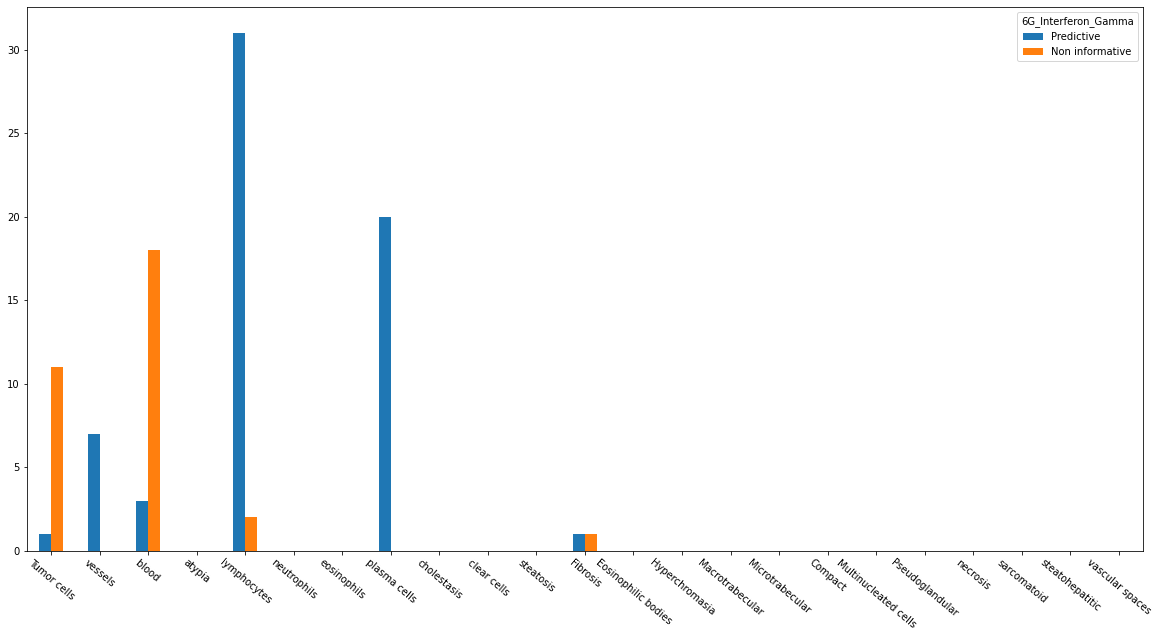

In [172]:
df_dummy = df_res.iloc[:2, :].reset_index(level=[0], drop=True).rename(index={1: 'Predictive', 0: 'Non informative'}).rename_axis('6G_Interferon_Gamma').T
ax = df_dummy.plot.bar(rot=320, figsize=(20, 10))
# for idx, label in enumerate(list(df.index)): 
#     for acc in df.columns:
#         value = np.round(df_dummy.ix[idx][acc],decimals=2)
#         ax.annotate(value,
#                     (idx, value),
#                      xytext=(0, 15), 
#                      textcoords='offset points')

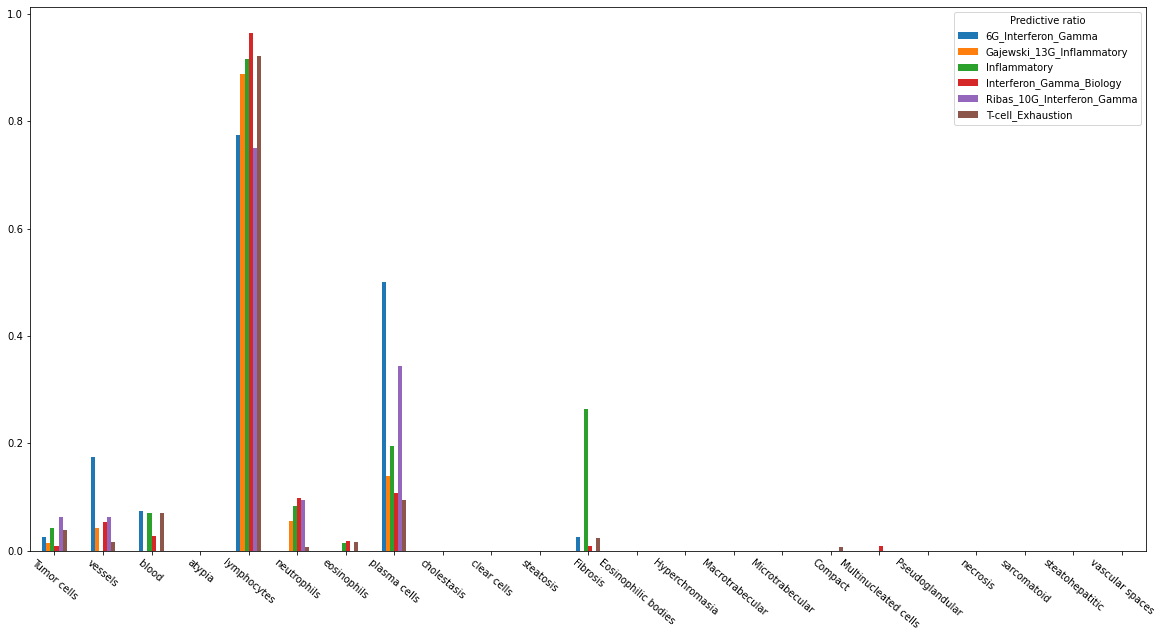

In [181]:
df_dummy = df_res_ratio.iloc[[0,2,4,6,8,10], :].reset_index(level=[1], drop=True).rename_axis('Predictive ratio').T
ax = df_dummy.plot.bar(rot=320, figsize=(20, 10))
# for idx, label in enumerate(list(df.index)): 
#     for acc in df.columns:
#         value = np.round(df_dummy.ix[idx][acc],decimals=2)
#         ax.annotate(value,
#                     (idx, value),
#                      xytext=(0, 15), 
#                      textcoords='offset points')